In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pylab as plt

In [2]:
def espirales_anidadas(n):

    r2    = np.random.uniform(0, 1, n)
    r = np.sqrt(r2)
    tita = np.random.uniform(-2*np.pi, 4*np.pi, n)
    x = r * np.cos(tita)
    y = r * np.sin(tita)
    
  
    
    sel, = np.where((r > tita/(4*np.pi)) & (r < (tita + np.pi)/(4*np.pi)))
    
    # ---- esto es una chanchada ...
    sel2, = np.where((r > (tita+2*np.pi)/(4*np.pi)) & (r < ((tita+2*np.pi) + np.pi)/(4*np.pi)))
    sel3, = np.where((r > (tita+4*np.pi)/(4*np.pi)) & (r < ((tita+4*np.pi) + np.pi)/(4*np.pi)))
    sel4, = np.where((r > (tita-2*np.pi)/(4*np.pi)) & (r < ((tita-2*np.pi) + np.pi)/(4*np.pi)))
    sel5, = np.where((r > (tita-4*np.pi)/(4*np.pi)) & (r < ((tita-4*np.pi) + np.pi)/(4*np.pi)))
    
    sel = np.concatenate([sel,sel2,sel3,sel4,sel5])
    # ------------------------------
    
    clases = np.ones(n)
    clases[sel] = 0
    
    df = pd.DataFrame({'x' : x, 'y' : y, 'r' : r, 'tita' : tita})
    df['clases'] = clases.astype(int)
    
    return df #x[sel],y[sel]

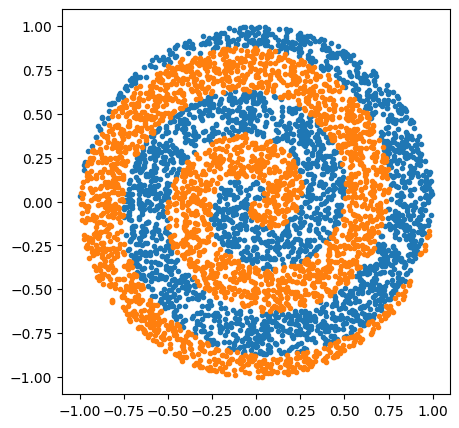

In [3]:
plt.figure(figsize=(5,5))

df = espirales_anidadas(5000)
clase1 = df.loc[df['clases'] == 1]
clase0 = df.loc[df['clases'] == 0]

plt.plot(clase1['x'],clase1['y'],ls='none',marker='o', markersize=3)
plt.plot(clase0['x'],clase0['y'],ls='none',marker='o', markersize=3)

1. Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

In [5]:
espirales_anidadas(5)

,x,y,r,tita,clases
0,-0.016373,-0.151215,0.152099,-1.678655,1
1,-0.615708,-0.226368,0.656003,3.493908,1
2,-0.153730,0.737814,0.753659,-4.506970,0
3,0.907360,0.263779,0.944924,6.566098,1
4,0.256290,-0.798747,0.838857,11.306062,1


In [41]:
df = espirales_anidadas(1000).drop(['r','tita'],axis=1)

In [42]:
y0 = df['clases']
X0 = df.drop(['clases'],axis = 1)

In [43]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 
#iris = load_iris() 
#X = iris.data 
#y = iris.target 
X_train, X_test, y_train, y_test = train_test_split(X0.values, y0.values, random_state=0) 
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf.fit(X_train, y_train) 
#tree.plot_tree(clf)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.005,
                       min_samples_leaf=5, random_state=0)

In [44]:
k = 0
for x,y in zip(X_test,y_test):
    #print(x)
    prediccion = clf.predict([x])
    if prediccion[0] == y:
        k = k + 1
        
print('precision:', k/len(y_test))

precision: 0.686


# Respuesta

In [65]:
df0 = espirales_anidadas(150).drop(['r','tita'],axis=1)
y0 = df0['clases']
X0 = df0.drop(['clases'],axis = 1)

df1 = espirales_anidadas(600).drop(['r','tita'],axis=1)
y1 = df1['clases']
X1 = df1.drop(['clases'],axis = 1)

df2 = espirales_anidadas(3000).drop(['r','tita'],axis=1)
y2 = df2['clases']
X2 = df2.drop(['clases'],axis = 1)

In [66]:
clf0 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf0.fit(X0.values, y0.values)

clf1 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf1.fit(X1.values, y1.values)

clf2 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
clf2.fit(X2.values, y2.values)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.005,
                       min_samples_leaf=5, random_state=0)

In [67]:
df_test = espirales_anidadas(10000).drop(['r','tita'],axis=1)
y_test = df['clases']
X_test = df.drop(['clases'],axis = 1)

In [86]:
y_predict0 = clf0.predict(X_test.values)
y_predict1 = clf1.predict(X_test.values)
y_predict2 = clf2.predict(X_test.values)

In [87]:
sel0, = np.where(y_predict0 == y_test.values)
sel1, = np.where(y_predict1 == y_test.values)
sel2, = np.where(y_predict2 == y_test.values)

print('recall:', len(sel0)/10000, len(sel1)/10000, len(sel2)/10000)


recall: 0.6712 0.836 0.8061


In [88]:
X_test

,x,y
0,-0.501120,0.664023
1,0.531485,-0.476554
2,0.903809,0.363600
3,-0.173858,0.496157
4,0.012253,-0.591911
...,...,...
9995,0.337349,-0.074065
9996,-0.285489,0.397070
9997,-0.207643,0.964149
9998,0.366791,-0.761860


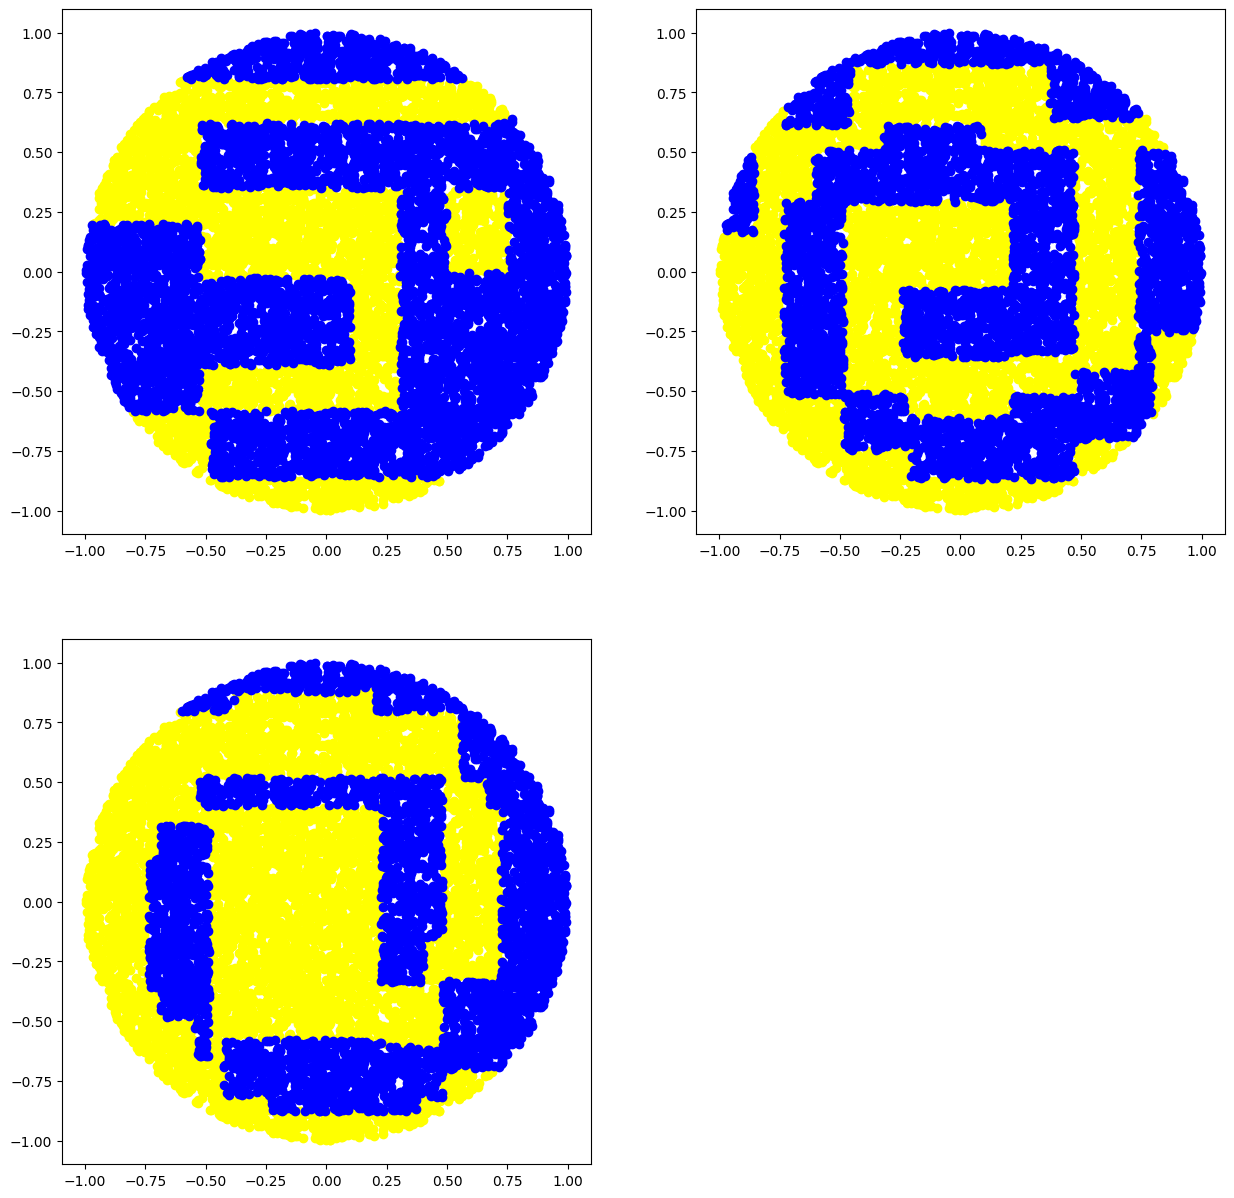

In [94]:
plt.figure(figsize=(15,15))

plt.subplot(221)
c0, = np.where(y_predict0 == 0)
c1, = np.where(y_predict0 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(222)
c0, = np.where(y_predict1 == 0)
c1, = np.where(y_predict1 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

plt.subplot(223)
c0, = np.where(y_predict2 == 0)
c1, = np.where(y_predict2 == 1)
plt.plot(X_test['x'][c0],X_test['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X_test['x'][c1],X_test['y'][c1],ls='none',marker='o',color='blue')

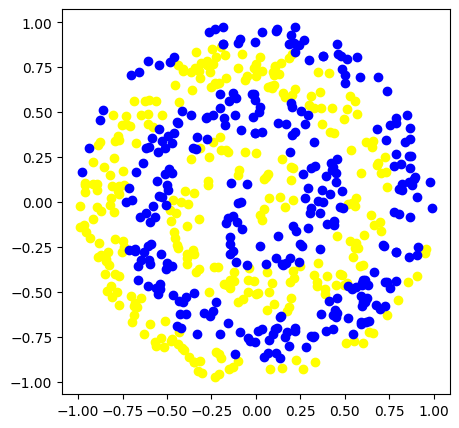

In [82]:
plt.figure(figsize=(5,5))

c0, = np.where(y1.values == 0)
c1, = np.where(y1.values == 1)
plt.plot(X1['x'][c0],X1['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X1['x'][c1],X1['y'][c1],ls='none',marker='o',color='blue')

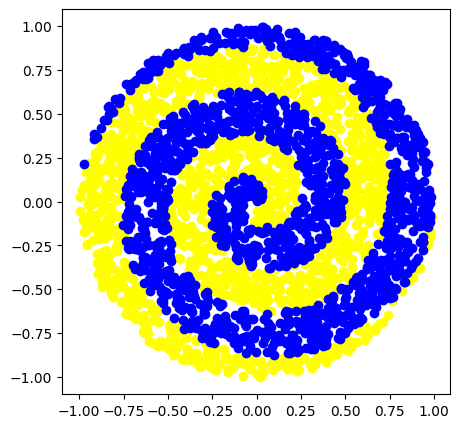

In [83]:
plt.figure(figsize=(5,5))

c0, = np.where(y2.values == 0)
c1, = np.where(y2.values == 1)
plt.plot(X2['x'][c0],X2['y'][c0],ls='none',marker='o',color='yellow')
plt.plot(X2['x'][c1],X2['y'][c1],ls='none',marker='o',color='blue')